<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/tf_05_approximation_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, selon les T.P de [Bruno DESPRES](https://www.ljll.math.upmc.fr/despres/)

> https://www.ljll.math.upmc.fr/~despres/BD_fichiers/FE.py

In [2]:
from matplotlib import pyplot
import numpy

import tensorflow
from keras import backend as K
from keras.layers import Conv2D, Dense, MaxPooling2D
from keras.models import Sequential

# Setup

In [3]:
N  = 40      # nombre de points de la discrétisation
dx = 1./N    # pas d'espace

def u(x: float) -> float:
    "Fonction à approcher" 
    return 1 - numpy.cos(2*numpy.pi * x)

# Construction du modèle

In [4]:
def init_W0(shape, dtype=None):
    W0 = numpy.array([numpy.ones(N)])
    return K.constant(W0)
    
def init_b0(shape, dtype=None): 
    "Initialisation du biais."
    return K.constant(-numpy.linspace(0,1,N))

def init_W1(shape, dtype=None):
    "Initialisation de l'opérateur W1."
    W1 = -2 * numpy.diag(numpy.ones(N)) + numpy.diag(numpy.ones(N-1), 1) 
    W1 = W1/dx
    return K.constant(W1)

def init_W2(shape, dtype=None):
    W2 = numpy.array( [[u(i*dx)] for i in range(N)] )
    return K.constant(W2)

model = Sequential()

model.add(
    Dense(
        N,
        input_dim=1,
        name="input_layer",
        kernel_initializer=init_W0,
        use_bias=True,
        bias_initializer=init_b0,
        activation='relu'
         )
)

model.add(
    Dense(
        N, 
        input_dim=1,
        name="hidden_layer",
        kernel_initializer=init_W1,
        use_bias=False,
        activation='relu'
         )
)

model.add(
    Dense(
        1,
        name="out_layer",
        kernel_initializer=init_W2,
        use_bias=False,
        activation='linear'
         )
)

# Approximation de $u$

In [5]:
x   = numpy.linspace(0, 1, N)
y_p = model.predict(x)

# Visualisation

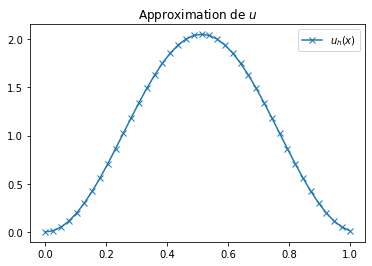

In [6]:
pyplot.figure()
pyplot.plot(x, y_p, label="$u_h(x)$", marker="x")
pyplot.title("Approximation de $u$")
pyplot.legend()
pyplot.show() 